# 課題0628

そのまま課題ファイルで編集しないでください。課題ファイルを複製してから課題を回答してください。

## 課題１

- ```NumPy```を使って、最小二乗法で重回帰分析の係数を推定する関数を作成しよう。
- 与えられたデータで実装して動作を確認せよ。

$$
\beta = (X^TX)^{-1}X^TY
$$

- [転置](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html)
```
numpy.transpose(a, axes=None)
```

- [逆行列](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html)
```
numpy.linalg.inv(a)
```

In [5]:
import numpy as np
def get_PartialRegressionCoefficient(x,y):
    xt= np.transpose(x)
    xtx= np.dot(xt,x)
    xtX_inv= np.linalg.inv(xtx)
    xty= np.dot(xt,y)
     
    return np.dot(xtX_inv,xty)

In [6]:
# このコードを実行し、データの読み込み
# もしsklearnがインストールされていない場合は、!pip install sklearnを実行してください
from sklearn.datasets import load_iris
iris = load_iris()
# Irisデータセットをロード
iris = load_iris()
X = iris.data[:,1:]  # 説明変数のデータ
Y = iris.data[:,0]  # 目的変数のデータ（がく片の幅）

In [7]:
# Yを従属変数、Xを独立変数として、線形回帰モデルを作成し、回帰係数を求める
get_PartialRegressionCoefficient(X,Y)

array([ 1.12106169,  0.92352887, -0.89567583])

[numpy.linalg.lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)

In [8]:
np.linalg.lstsq(X,Y,rcond=None)[0]

array([ 1.12106169,  0.92352887, -0.89567583])

## 課題2

以下の指示に従ってクラスを作成してください。

- クラスをインスタント化する際は二つ同じサイズの```ndarray```($v_1$と$v_2$)が渡されます
- クラスに$v_1$と$v_2$が同じサイズであるかどうかを確認するメソッドを実装しよう
- クラスに$v_1$が$v_2$に射影する結果を計算するメソッドを実装しよう
- クラスに$v_1$と$v_2$のコサイン類似度を計算するメソッドを実装しよう

In [5]:
class Vector:
    def __init__(self, v1, v2):
        self.v1 = v1
        self.v2 = v2
    
    def check_size(self):
        if self.v1.shape == self.v2.shape:
            print("v1 and v2 have the same size.")
        else:
            print("v1 and v2 have different sizes.")
    
    def projection(self):
        dot_product = np.dot(self.v1, self.v2)
        norm_squared = np.dot(self.v2, self.v2)
        result = (dot_product / norm_squared) * self.v2
        return result
    
    def cosine_similarity(self):
        dot_product = np.dot(self.v1, self.v2)
        norm_v1 = np.linalg.norm(self.v1)
        norm_v2 = np.linalg.norm(self.v2)
        similarity = dot_product / (norm_v1 * norm_v2)
        return similarity

$$
similarity= \frac{v_1 \cdot v_2}{||v_1||\cdot||v_2||}
$$

In [6]:
# 確認
import numpy as np
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

In [7]:
vector = Vector(v1, v2)

In [8]:
vector.check_size()

v1 and v2 have the same size.


In [9]:
vector.projection()

array([1.66233766, 2.07792208, 2.49350649])

In [10]:
vector.cosine_similarity()

0.9746318461970762

## 追加課題
NumpyでRandom Walkを実装してください

ランダムウォークは、ランダムなステップによって生成される進行のモデルです。
各ステップでは、ある確率分布からのランダムな選択に基づいて進む方向が決定されます。一次元の場合、ステップは通常、$-1$または$+1$の値を取ります。

In [11]:
import numpy as np

def random_walk(n_steps):
    steps = np.random.choice([-1, 1], size=n_steps)
    positions = np.cumsum(steps)
    return positions

n_steps = 1000
positions = random_walk(n_steps)

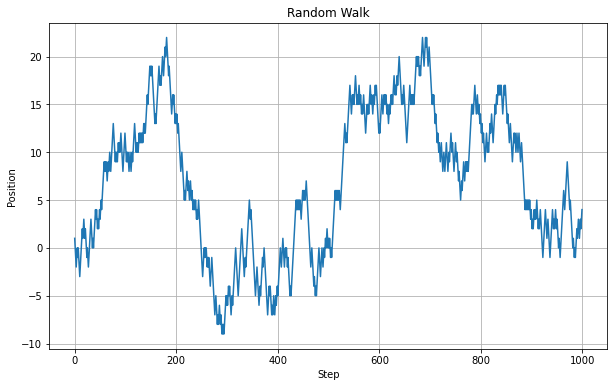

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.arange(n_steps), positions)
plt.title("Random Walk")
plt.xlabel("Step")
plt.ylabel("Position")
plt.grid(True)
plt.show()

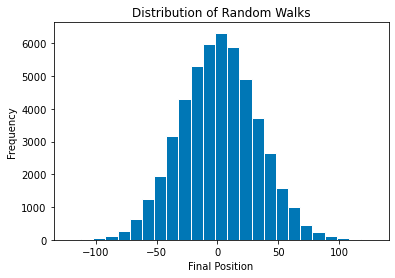

In [13]:
all_positions = []

# 5000回のランダムウォークを実行
for _ in range(50000):
    positions = random_walk(n_steps)
    all_positions.append(positions[-1])  # 最終位置のみを保存

# 結果の分布をプロット
plt.hist(all_positions, bins=25,color='#0077B6', edgecolor='white')
plt.title("Distribution of Random Walks")
plt.xlabel("Final Position")
plt.ylabel("Frequency")
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib ipympl
# ランダムウォークのパラメータ
num_steps = 1000  # ステップ数
step_size = 0.5  # 1ステップあたりの移動距離

# 初期位置
start_position = np.array([0, 0])

# ランダムウォークの関数
def random_walk_2d(num_steps, step_size):
    # ステップごとのランダムな移動ベクトルを生成
    random_steps = np.random.randn(num_steps, 2) * step_size
    # 各ステップの位置を計算
    positions = np.cumsum(random_steps, axis=0)
    # 初期位置を追加
    return np.vstack([start_position, positions])

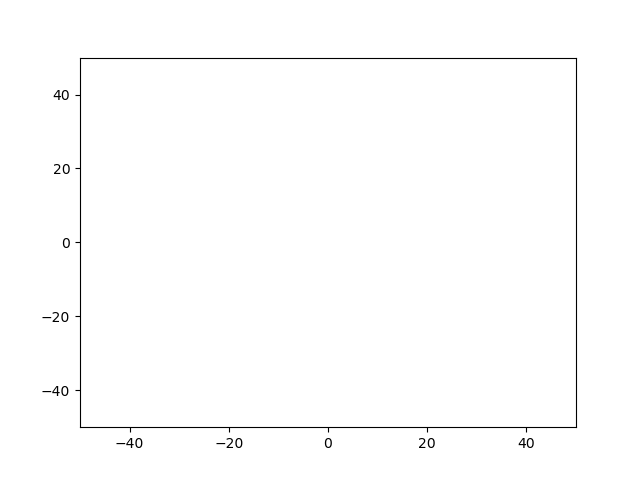

In [3]:
# ランダムウォークの実行
path = random_walk_2d(num_steps, step_size)

# 可視化の設定
fig, ax = plt.subplots()
ax.set_xlim(-50, 50)  # x軸の範囲
ax.set_ylim(-50, 50)  # y軸の範囲
line, = ax.plot([], [], lw=2)

# アニメーションの初期化関数
def init():
    line.set_data([], [])
    return line,

# アニメーションの更新関数
def update(frame):
    line.set_data(path[:frame, 0], path[:frame, 1])
    return line,

# アニメーションの作成
ani = FuncAnimation(fig, update, frames=num_steps, init_func=init, blit=True)

# アニメーションの表示
plt.show()